### Multiple Linear Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing the dataset

In [2]:
os.chdir(r'D:\for github\data\Case_2')
path_data = os.getcwd()
weather_data = pd.read_csv('WeatherHistory.csv')
weather_data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### EDA

In [3]:
# describes allnumerical and  categorical data
weather_data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 17:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [4]:
#weather_data.drop(['Apparent Temperature (C)'], axis=1)

In [5]:
weather_data.isnull().sum() # Missing value in coloumn

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
weather_data.info() # Missing value in Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
weather_data.dropna(inplace=True) # imputing missing values

In [8]:
weather_data["Formatted Date"] = pd.to_datetime(weather_data["Formatted Date"], errors='coerce', utc=True)
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
weather_data.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [10]:
weather_data['Month'] = weather_data['Formatted Date'].dt.month
weather_data['Year'] = weather_data['Formatted Date'].dt.year
weather_data['Day'] = weather_data['Formatted Date'].dt.day
weather_data['Hour'] = weather_data['Formatted Date'].dt.hour
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Year,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3,2006,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3,2006,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4,2006,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4,2006,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4,2006,1,2


In [11]:
# describes all  categorical data

weather_data.describe(include=['O'])

,Summary,Precip Type,Daily Summary
count,95936,95936,95936
unique,27,2,214
top,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,31635,85224,20020


In [12]:
# pairwise correlation of all column

weather_data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month,Year,Day,Hour
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,NaN,-0.005253,0.150479,0.019392,-0.000501,0.099310
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,NaN,-0.000037,0.159874,0.018931,0.002022,0.095724
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,NaN,0.005375,0.055665,0.038440,0.005022,-0.159670
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,NaN,-0.049453,-0.099490,-0.005107,-0.007823,0.011103
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,NaN,-0.011629,-0.019018,-0.025530,-0.003542,-0.003507
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,NaN,0.061011,-0.068027,0.114930,-0.023532,0.104155
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,NaN,1.000000,-0.020034,0.015111,-0.016032,-0.005750
Month,0.150479,0.159874,0.055665,-0.099490,-0.019018,-0.068027,NaN,-0.020034,1.000000,-0.006540,0.008542,0.000157
Year,0.019392,0.018931,0.038440,-0.005107,-0.025530,0.114930,NaN,0.015111,-0.006540,1.000000,-0.003278,-0.000208


<AxesSubplot:>

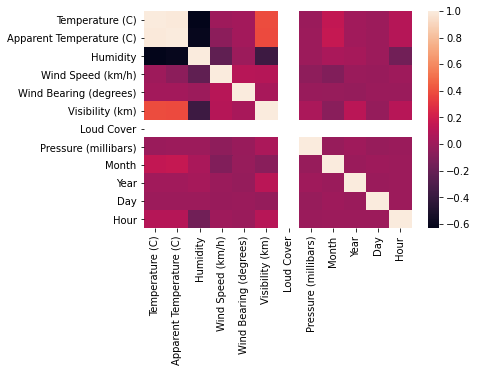

In [13]:
sns.heatmap(weather_data.corr()) # for visualization poit

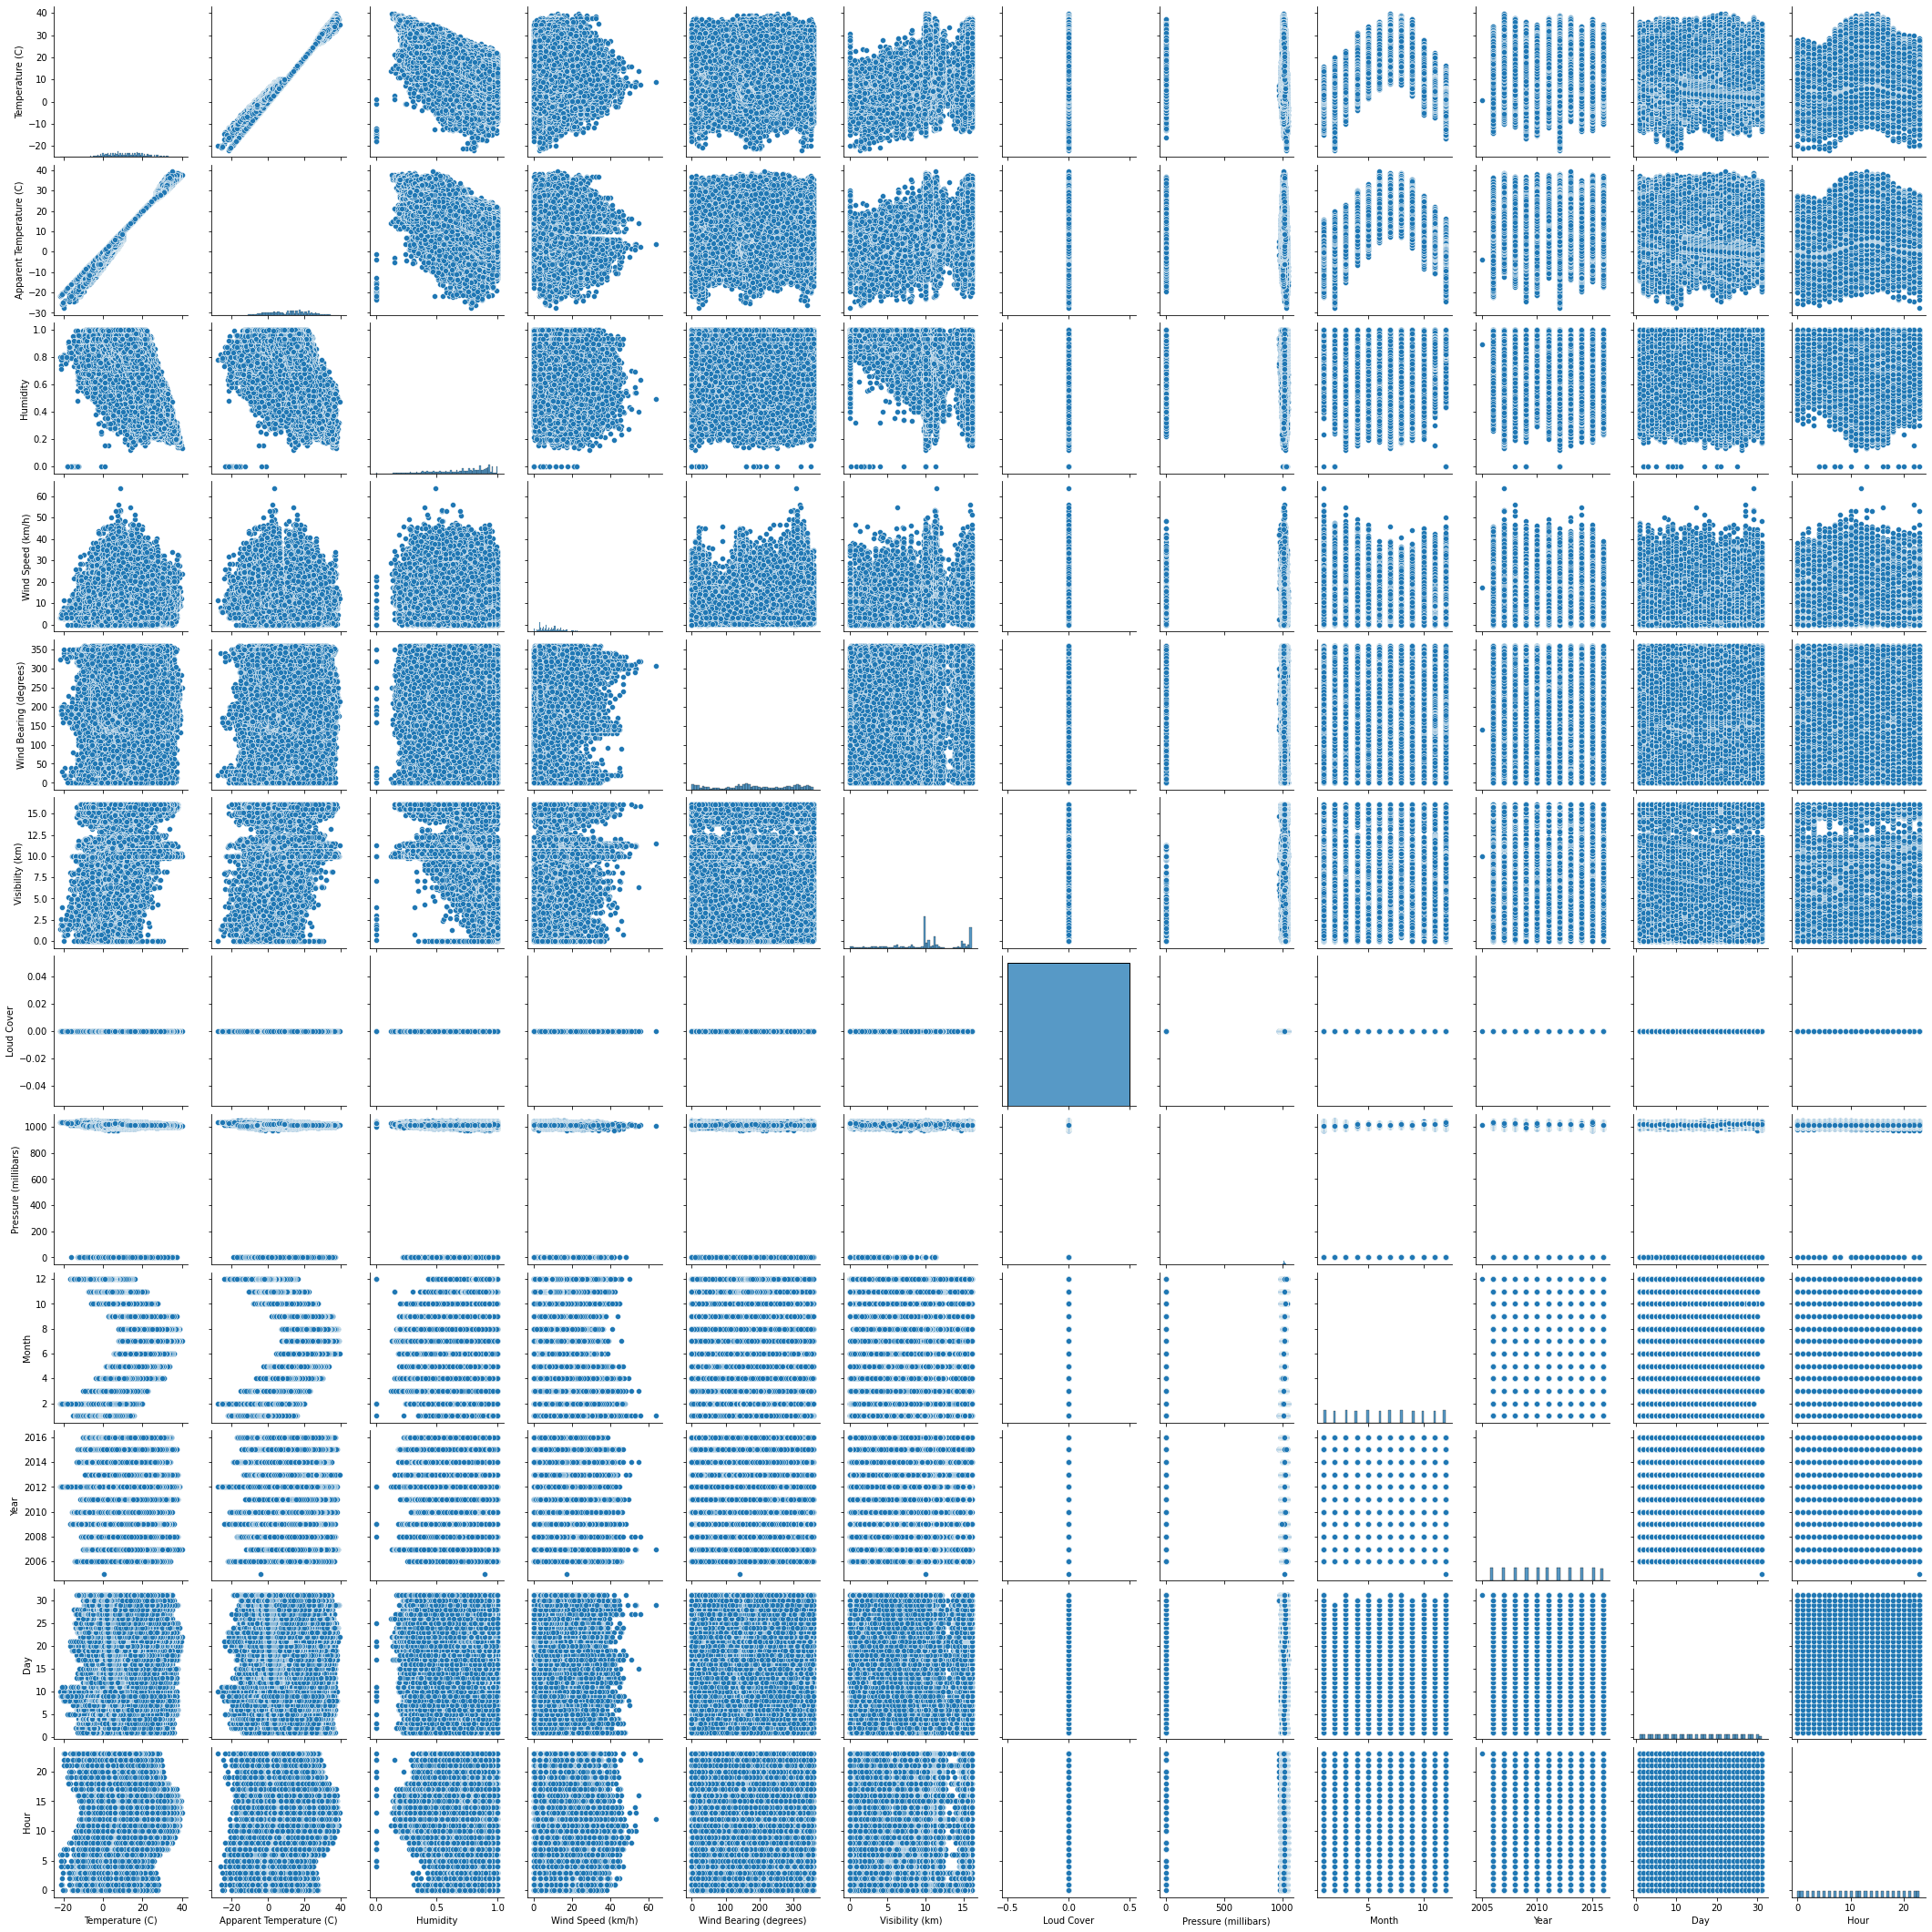

In [14]:
sns.pairplot(weather_data)

In [15]:
weather_data.drop(["Formatted Date", 'Loud Cover', 'Daily Summary'], axis =1, inplace= True)

In [16]:
data_set=weather_data.iloc[:,0:12]
print(data_set)

             Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0      Partly Cloudy        rain         9.472222                  7.388889   
1      Partly Cloudy        rain         9.355556                  7.227778   
2      Mostly Cloudy        rain         9.377778                  9.377778   
3      Partly Cloudy        rain         8.288889                  5.944444   
4      Mostly Cloudy        rain         8.755556                  6.977778   
...              ...         ...              ...                       ...   
96448  Partly Cloudy        rain        26.016667                 26.016667   
96449  Partly Cloudy        rain        24.583333                 24.583333   
96450  Partly Cloudy        rain        22.038889                 22.038889   
96451  Partly Cloudy        rain        21.522222                 21.522222   
96452  Partly Cloudy        rain        20.438889                 20.438889   

       Humidity  Wind Speed (km/h)  Wind Bearing (d

In [17]:
data_set.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Year,Day
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253,0.150479,0.019392,-0.000501
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037,0.159874,0.018931,0.002022
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375,0.055665,0.038440,0.005022
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453,-0.099490,-0.005107,-0.007823
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629,-0.019018,-0.025530,-0.003542
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011,-0.068027,0.114930,-0.023532
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000,-0.020034,0.015111,-0.016032
Month,0.150479,0.159874,0.055665,-0.099490,-0.019018,-0.068027,-0.020034,1.000000,-0.006540,0.008542
Year,0.019392,0.018931,0.038440,-0.005107,-0.025530,0.114930,0.015111,-0.006540,1.000000,-0.003278
Day,-0.000501,0.002022,0.005022,-0.007823,-0.003542,-0.023532,-0.016032,0.008542,-0.003278,1.000000


<AxesSubplot:xlabel='Temperature (C)', ylabel='Humidity'>

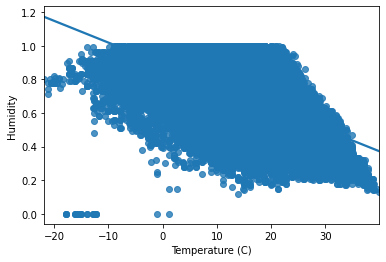

In [18]:
# plotting a scatter plot between temp and humdity

sns.regplot(x=data_set["Temperature (C)"], y=data_set["Humidity"])

### Identified Outlier removal based on Z-Score

In [19]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_data = detect_outlier(data_set["Humidity"])
print (outlier_data)


[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [20]:
#Removing the Outliers

data_set_clean = data_set[data_set["Humidity"]>0.15]
print(data_set_clean)

             Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0      Partly Cloudy        rain         9.472222                  7.388889   
1      Partly Cloudy        rain         9.355556                  7.227778   
2      Mostly Cloudy        rain         9.377778                  9.377778   
3      Partly Cloudy        rain         8.288889                  5.944444   
4      Mostly Cloudy        rain         8.755556                  6.977778   
...              ...         ...              ...                       ...   
96448  Partly Cloudy        rain        26.016667                 26.016667   
96449  Partly Cloudy        rain        24.583333                 24.583333   
96450  Partly Cloudy        rain        22.038889                 22.038889   
96451  Partly Cloudy        rain        21.522222                 21.522222   
96452  Partly Cloudy        rain        20.438889                 20.438889   

       Humidity  Wind Speed (km/h)  Wind Bearing (d

<AxesSubplot:xlabel='Temperature (C)', ylabel='Humidity'>

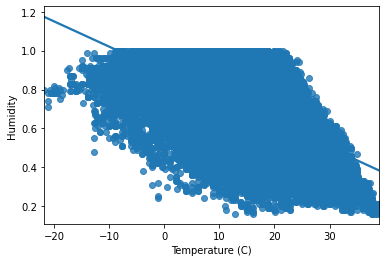

In [21]:
sns.regplot(x=data_set_clean["Temperature (C)"], y=data_set_clean["Humidity"])

### Creating the Independendent and Dependent Data Sets

In [22]:
#Feature Data

x = data_set_clean.iloc[:,[1,3,4]]
print(x)

      Precip Type  Apparent Temperature (C)  Humidity
0            rain                  7.388889      0.89
1            rain                  7.227778      0.86
2            rain                  9.377778      0.89
3            rain                  5.944444      0.83
4            rain                  6.977778      0.83
...           ...                       ...       ...
96448        rain                 26.016667      0.43
96449        rain                 24.583333      0.48
96450        rain                 22.038889      0.56
96451        rain                 21.522222      0.60
96452        rain                 20.438889      0.61

[95898 rows x 3 columns]


In [23]:
# Dependent Data

y = data_set_clean.iloc[:,[2]]
print(y)

       Temperature (C)
0             9.472222
1             9.355556
2             9.377778
3             8.288889
4             8.755556
...                ...
96448        26.016667
96449        24.583333
96450        22.038889
96451        21.522222
96452        20.438889

[95898 rows x 1 columns]


In [24]:
X1 = pd.get_dummies(x, columns =['Precip Type'])
print(X1)

       Apparent Temperature (C)  Humidity  Precip Type_rain  Precip Type_snow
0                      7.388889      0.89                 1                 0
1                      7.227778      0.86                 1                 0
2                      9.377778      0.89                 1                 0
3                      5.944444      0.83                 1                 0
4                      6.977778      0.83                 1                 0
...                         ...       ...               ...               ...
96448                 26.016667      0.43                 1                 0
96449                 24.583333      0.48                 1                 0
96450                 22.038889      0.56                 1                 0
96451                 21.522222      0.60                 1                 0
96452                 20.438889      0.61                 1                 0

[95898 rows x 4 columns]


### Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0,)
print(X1_train)
print(X1_test)
print(y_train)
print(y_test)

       Apparent Temperature (C)  Humidity  Precip Type_rain  Precip Type_snow
19531                 -5.177778      0.86                 0                 1
40454                  6.977778      0.42                 1                 0
66065                 34.755556      0.39                 1                 0
10892                 -3.361111      0.82                 0                 1
89119                 24.027778      0.45                 1                 0
...                         ...       ...               ...               ...
21255                 29.200000      0.35                 1                 0
45907                  0.122222      0.85                 1                 0
42629                  6.650000      0.93                 1                 0
43583                 11.622222      0.96                 1                 0
68449                 -2.872222      0.91                 0                 1

[76718 rows x 4 columns]
       Apparent Temperature (C)  Humid

In [26]:
'''#printing shapes of testing and training sets :

print("shape of original dataset :", weather_data.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)'''

'#printing shapes of testing and training sets :\n\nprint("shape of original dataset :", weather_data.shape)\nprint("shape of input - training set", x_train.shape)\nprint("shape of output - training set", y_train.shape)\nprint("shape of input - testing set", x_test.shape)\nprint("shape of output - testing set", y_test.shape)'

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(regressor)
regressor1 = regressor.fit(X1_train, y_train)
print(regressor1)

LinearRegression()
LinearRegression()


In [28]:
regressor.coef_

array([[ 0.8503995 , -2.75451964,  0.16903686, -0.16903686]])

In [29]:
regressor.intercept_

array([4.59652165])

In [30]:
# Predicting the Test set results
y_pred = regressor.predict(X1_test)
print(y_pred)
y_pred_data=pd.DataFrame(y_pred)
print(y_pred)

[[22.46382276]
 [21.91962623]
 [ 1.55162945]
 ...
 [ 8.92825439]
 [11.72271951]
 [ 7.40247122]]
[[22.46382276]
 [21.91962623]
 [ 1.55162945]
 ...
 [ 8.92825439]
 [11.72271951]
 [ 7.40247122]]


In [31]:
reg1 = regressor.score(X1_train,y_train)
print(reg1)

reg2 = regressor.score(X1_test,y_test)
print(reg2)

0.9872798055493971
0.9872643461385604


In [32]:
#Root Mean Square Error

from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0805078047281784


### Model Statistics

In [33]:
#Adding Intercept term to the model
X1_train=sm.add_constant(X1_train)
print(X1_train)
X1_test=sm.add_constant(X1_test)
print(X1_test)

       const  Apparent Temperature (C)  Humidity  Precip Type_rain  \
19531    1.0                 -5.177778      0.86                 0   
40454    1.0                  6.977778      0.42                 1   
66065    1.0                 34.755556      0.39                 1   
10892    1.0                 -3.361111      0.82                 0   
89119    1.0                 24.027778      0.45                 1   
...      ...                       ...       ...               ...   
21255    1.0                 29.200000      0.35                 1   
45907    1.0                  0.122222      0.85                 1   
42629    1.0                  6.650000      0.93                 1   
43583    1.0                 11.622222      0.96                 1   
68449    1.0                 -2.872222      0.91                 0   

       Precip Type_snow  
19531                 1  
40454                 0  
66065                 0  
10892                 1  
89119                 0  
...

In [34]:
#Converting into Dataframe
X1_train_d=pd.DataFrame(X1_train)
print(X1_train_d)

#Printing the Model Statistics
model = sm.OLS(y_pred,X1_test).fit()
model.summary()

       const  Apparent Temperature (C)  Humidity  Precip Type_rain  \
19531    1.0                 -5.177778      0.86                 0   
40454    1.0                  6.977778      0.42                 1   
66065    1.0                 34.755556      0.39                 1   
10892    1.0                 -3.361111      0.82                 0   
89119    1.0                 24.027778      0.45                 1   
...      ...                       ...       ...               ...   
21255    1.0                 29.200000      0.35                 1   
45907    1.0                  0.122222      0.85                 1   
42629    1.0                  6.650000      0.93                 1   
43583    1.0                 11.622222      0.96                 1   
68449    1.0                 -2.872222      0.91                 0   

       Precip Type_snow  
19531                 1  
40454                 0  
66065                 0  
10892                 1  
89119                 0  
...

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.349e+34
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:27:58   Log-Likelihood:             5.9918e+05
No. Observations:               19180   AIC:                        -1.198e+06
Df Residuals:                   19176   BIC:                        -1.198e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.0643    1.8e-16   1.71e+16      0.000       3.064       3.064
Apparent Temperature (C)     0.8504   6.64e-18   1.28e+17      0.000       0.850       0.850
Humidity                    -2.7545   3.09e-16  -8.92e+15      0.000      -2.755      -2.755
Precip Type_rain             1.7012    1.3e-16   1.31e+16      0.000       1.701       1.701
Precip Type_snow             1.3631   1.27e-16   1.07e+16      0.000       1.363       1.363
==============================================================================
Omnibus:                      501.171   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1059.676
Skew:                           0.150   Prob(JB):                    7.84e-231
Kurtosis:                       4.112   Cond. No.                     5.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
#Checking the VIF Values

from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X1_train.values, j) for j in range(X1_train.shape[1])]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[0.0, 2.252128344930922, 1.6236506133996031, inf, inf]

In [36]:
New_X1_train=X1_train.drop(["Precip Type_snow"],axis = 1)
print(New_X1_train)
New_X1_test=X1_test.drop(["Precip Type_snow"],axis = 1)
print(New_X1_test)

       const  Apparent Temperature (C)  Humidity  Precip Type_rain
19531    1.0                 -5.177778      0.86                 0
40454    1.0                  6.977778      0.42                 1
66065    1.0                 34.755556      0.39                 1
10892    1.0                 -3.361111      0.82                 0
89119    1.0                 24.027778      0.45                 1
...      ...                       ...       ...               ...
21255    1.0                 29.200000      0.35                 1
45907    1.0                  0.122222      0.85                 1
42629    1.0                  6.650000      0.93                 1
43583    1.0                 11.622222      0.96                 1
68449    1.0                 -2.872222      0.91                 0

[76718 rows x 4 columns]
       const  Apparent Temperature (C)  Humidity  Precip Type_rain
96203    1.0                 21.977778      0.36                 1
27043    1.0                 21.1111

In [37]:
regressor.fit(New_X1_train, y_train)

LinearRegression()

In [38]:
model1 = sm.OLS(y_pred,X1_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.349e+34
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:27:58   Log-Likelihood:             5.9918e+05
No. Observations:               19180   AIC:                        -1.198e+06
Df Residuals:                   19176   BIC:                        -1.198e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.0643    1.8e-16   1.71e+16      0.000       3.064       3.064
Apparent Temperature (C)     0.8504   6.64e-18   1.28e+17      0.000       0.850       0.850
Humidity                    -2.7545   3.09e-16  -8.92e+15      0.000      -2.755      -2.755
Precip Type_rain             1.7012    1.3e-16   1.31e+16      0.000       1.701       1.701
Precip Type_snow             1.3631   1.27e-16   1.07e+16      0.000       1.363       1.363
==============================================================================
Omnibus:                      501.171   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1059.676
Skew:                           0.150   Prob(JB):                    7.84e-231
Kurtosis:                       4.112   Cond. No.                     5.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
#Storing Coefficients in DataFrame along with coloumn names

coefficients = pd.concat([pd.DataFrame(X1_train_d.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(coefficients)

                          0         0
0                     const  0.000000
1  Apparent Temperature (C)  0.850400
2                  Humidity -2.754520
3          Precip Type_rain  0.338074
4          Precip Type_snow       NaN
